<a href="https://colab.research.google.com/github/gledson85/Tech-Challenge---Fase-1/blob/main/Tech_Challenge_Fase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O problema:** Você é um(a) profissional encarregado(a) de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

Massa de dados = https://www.kaggle.com/datasets/mirichoi0218/insurance/data

# 1. Exploração de dados:

1.1 - Carregue a base de dados e explore suas características
  * Realizando a instalação das libs necessarias

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

* Importando todas as dependências utilizadas no nosso processo de ML

In [2]:
import pandas as pds
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

* Carregando arquivo

In [3]:
file = 'https://raw.githubusercontent.com/gledson85/Tech-Challenge---Fase-1/refs/heads/main/insurance.csv'
df = pds.read_csv(file)

* Apresentando as primeiras linhas

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* Apresentando as informações do dataset/dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Inferência sobre a base de dados:**

Podemos observar que temos algumas variáveis como: age,	sex, bmi, children, smoker,	region e charges.

**Variável Target:** No nosso case a target é a coluna **charges**.


In [6]:
set(df.charges)

{40974.1649,
 8211.1002,
 32787.45859,
 24603.04837,
 8219.2039,
 16420.49455,
 8232.6388,
 8233.0975,
 8240.5896,
 8252.2843,
 16450.8947,
 16455.70785,
 41034.2214,
 8269.044,
 8277.523,
 8280.6227,
 24667.419,
 8283.6807,
 24671.66334,
 8302.53565,
 8310.83915,
 41097.16175,
 8334.45755,
 8334.5896,
 8342.90875,
 8347.1643,
 16577.7795,
 16586.49771,
 8410.04685,
 8413.46305,
 8428.0693,
 8442.667,
 8444.474,
 8457.818,
 16657.71745,
 24869.8368,
 24873.3849,
 8515.7587,
 8516.829,
 8520.026,
 8522.003,
 8527.532,
 24915.04626,
 24915.22085,
 8534.6718,
 8538.28845,
 8539.671,
 8547.6913,
 8551.347,
 8556.907,
 8569.8618,
 8582.3023,
 16776.30405,
 8596.8278,
 8601.3293,
 8603.8234,
 8604.48365,
 16796.41194,
 8606.2174,
 8605.3615,
 8615.3,
 49577.6624,
 8627.5411,
 8671.19125,
 8688.85885,
 16884.924,
 25081.76784,
 8703.456,
 33307.5508,
 8733.22925,
 8765.249,
 8782.469,
 8798.593,
 8823.279,
 8823.98575,
 8825.086,
 8827.2099,
 8835.26495,
 17043.3414,
 8871.1517,
 17081.08,
 8

* Apresentando a quantidade de linhas e colunas do dataset/dataframe

In [9]:
df.shape

(1338, 7)

# 2. Pré-processamento de dados:

2.1 - Realize a limpeza dos dados, tratando valores ausentes (se necessário)
* Validar se há dados nulos

In [11]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


* Deletar dados nulos se houver

In [12]:
for column_name in df.columns:
  qtd_null_lines = df[column_name].isnull().sum()
  print(f"{column_name} column has {qtd_null_lines} null lines")
  if qtd_null_lines > 0:
    df[column_name] = df[column_name].dropna()

age column has 0 null lines
sex column has 0 null lines
bmi column has 0 null lines
children column has 0 null lines
smoker column has 0 null lines
region column has 0 null lines
charges column has 0 null lines


* Revalidar se há dados nulos após remoção

In [13]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


2.2 Conversões variáveis categóricas em formatos adequados para modelagem
* Categorizando a coluna sex, smoker e region

In [15]:
labelencoder = LabelEncoder()
print(f"-> Valores de sex = {set(df['sex'])}")
df['category_sex'] = labelencoder.fit_transform(df['sex'])

print(f"-> Valores de smoker = {set(df['smoker'])}")
df['category_smoker'] = labelencoder.fit_transform(df['smoker'])

print(f"-> Valores de region = {set(df['region'])}")
df['category_region'] = labelencoder.fit_transform(df['region'])

df[["age","sex","category_sex","bmi","children","smoker","category_smoker","region","category_region","charges"]].head()

-> Valores de sex = {'female', 'male'}
-> Valores de smoker = {'yes', 'no'}
-> Valores de region = {'southeast', 'southwest', 'northeast', 'northwest'}


,age,sex,category_sex,bmi,children,smoker,category_smoker,region,category_region,charges
0,19,female,0,27.900,0,yes,1,southwest,3,16884.92400
1,18,male,1,33.770,1,no,0,southeast,2,1725.55230
2,28,male,1,33.000,3,no,0,southeast,2,4449.46200
3,33,male,1,22.705,0,no,0,northwest,1,21984.47061
4,32,male,1,28.880,0,no,0,northwest,1,3866.85520


2.2 - Analisando estatísticas descritivas e verificando distribuições relevantes

In [24]:
df.describe()

,age,bmi,children,charges,category_sex,category_smoker,category_region
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,1.515695
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,2.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


* Analisando a distribuição das variáveis se possui outlines

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'charges'}>,
        <Axes: title={'center': 'category_sex'}>,
        <Axes: title={'center': 'category_smoker'}>],
       [<Axes: title={'center': 'category_region'}>, <Axes: >, <Axes: >]],
      dtype=object)

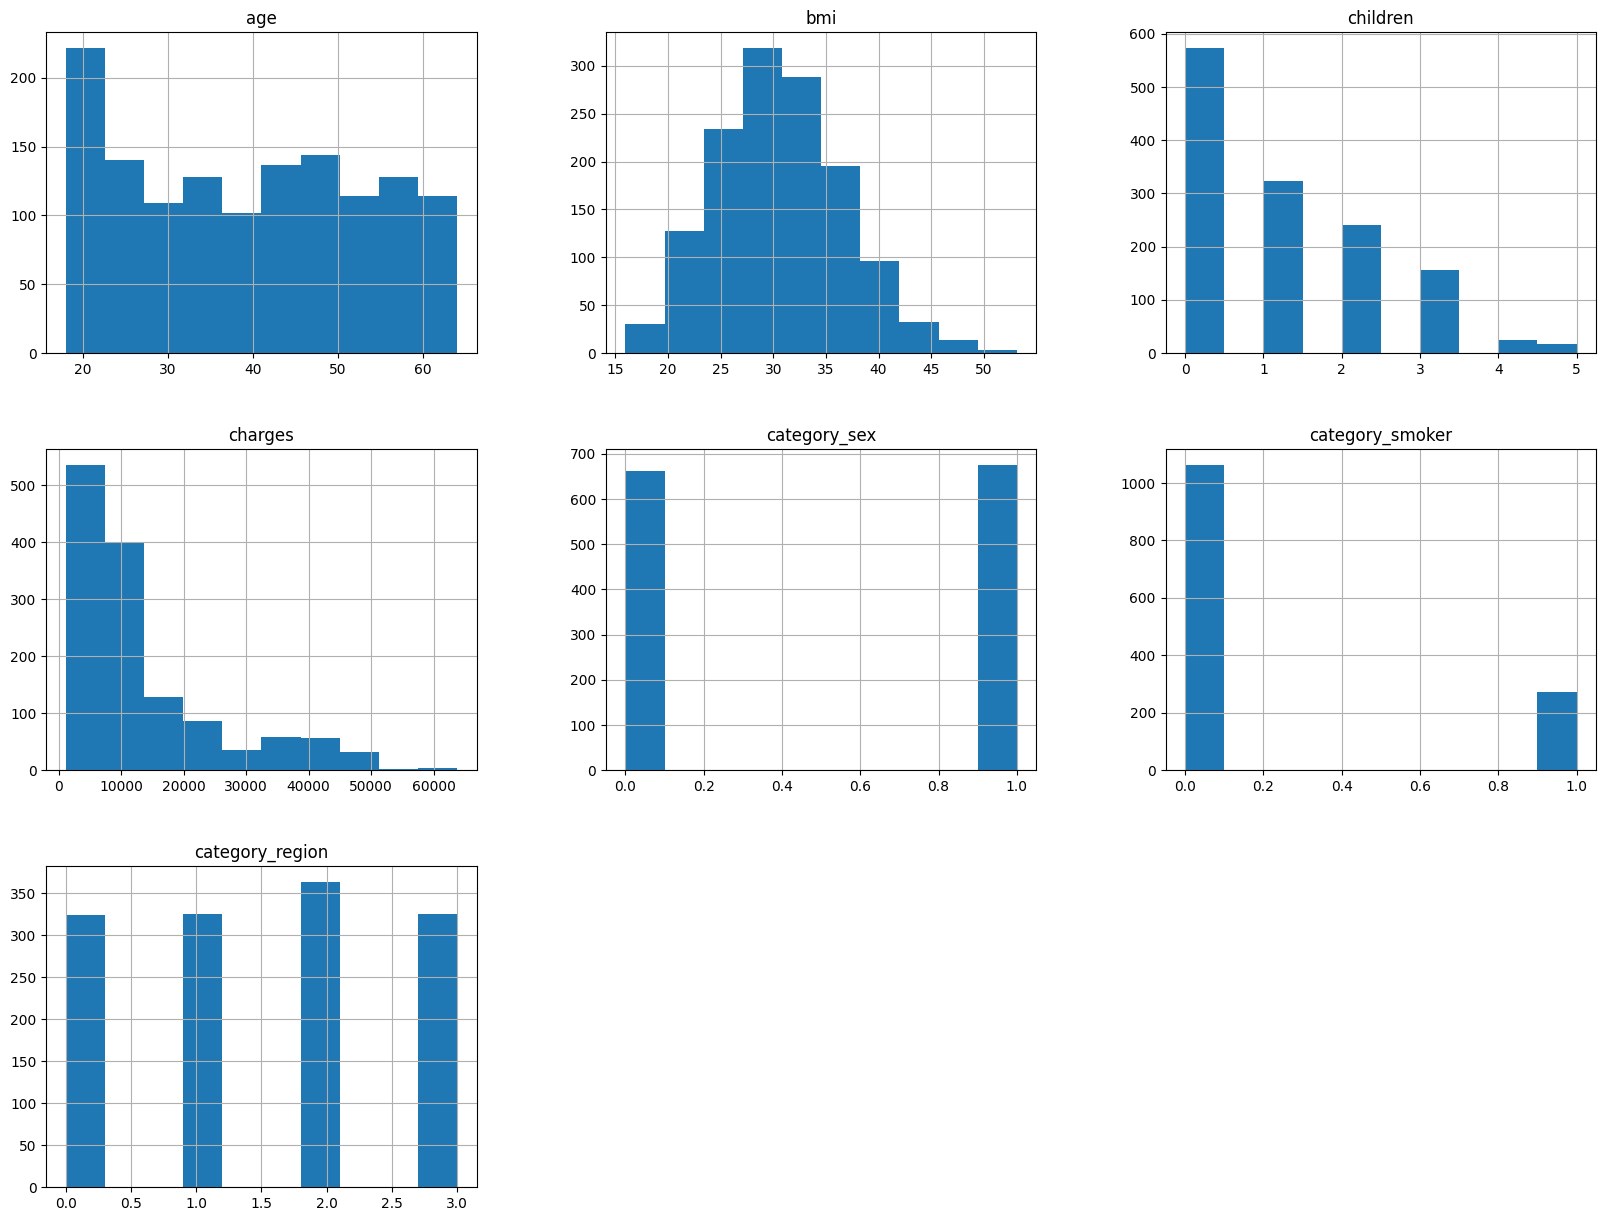

In [25]:
df.hist(bins=10, figsize=(20,15))

* Analisando correlações entre as variáveis

<Axes: >

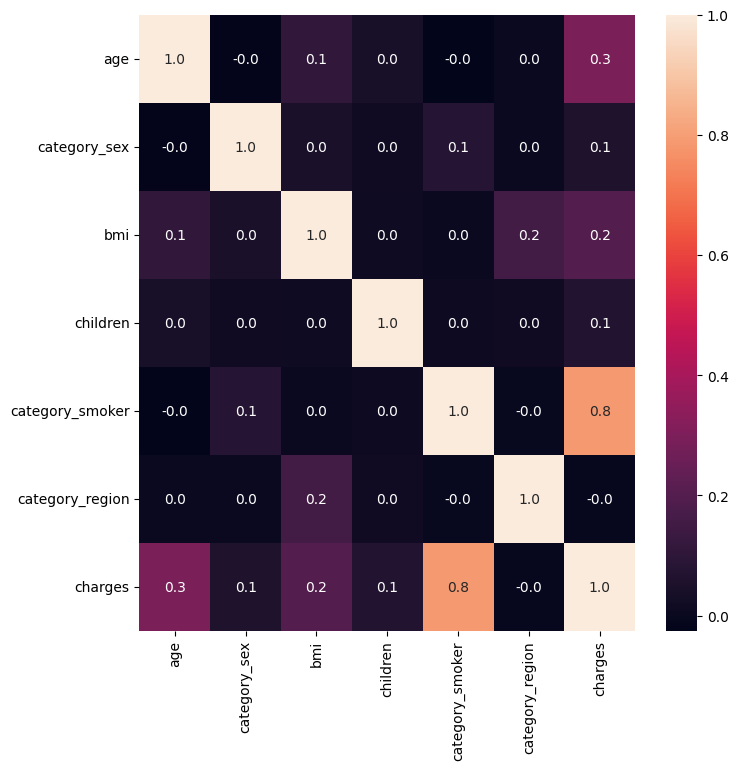

In [26]:
correlation_matrix = df[["age","category_sex","bmi","children","category_smoker","category_region","charges"]].corr(method='pearson')
plt.figure(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, fmt=".1f")

2.2 Separar o campo target do resto do dataframe
  * comando:
    - X = df.drop('encargos', axis=1) e y = df['encargos']

In [27]:
x = df.drop('charges', axis=1)
y = df['charges']

#3. Modelagem:

3.1 Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo: Regressão Linear, Árvores de Decisão etc)
  
  * Random Forest Regressor	Relações não lineares, variáveis mistas (numéricas + categóricas codificadas):
    - modelo = RandomForestClassifier(n_estimators=200, random_state=42)
    - modelo.fit(X_train, y_train)
  * Divida o conjunto de dados em conjuntos de treinamento e teste:
    - X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



#4. Treinamento e avaliação do modelo:

 * Treine o modelo com o conjunto de treinamento:
    - modelo = RandomForestClassifier(n_estimators=200, random_state=42)
    - modelo.fit(X_train, y_train)

#5. Validação estatística:

  * Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança):
    - y_pred = modelo.predict(X_test)
    - acc = accuracy_score(y_test, y_pred)

6. O que avaliaremos:
  * Apresente resultados visuais, como gráficos de previsões versus valores reais
  * Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística